In [13]:
install.packages("tidyr")

also installing the dependencies 'rlang', 'dplyr'

Warning message:
"package 'dplyr' is in use and will not be installed"

package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Henrique\Anaconda3\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\Henrique\Anaconda3\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"

package 'tidyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\Wondershare\CreatorTemp\RtmponNWEJ\downloaded_packages


In [21]:
library(srvyr)
library(ggplot2)
library(ggpubr)
library(dplyr)
library(knitr)
# library(tidyr)
library(dummies)
library(mlr)
library(caret)
library(brazilmaps)
library(AER)

Warning message:
"package 'caret' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'caret' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'rlang' 0.3.4 is already loaded, but >= 0.4.0 is required


# Introdução

## R Markdown

## Leitura e preparação dos dados

Os dados da Pesquisa Nacional de Saúde 2013 são disponibilizados pelo IBGE no seu site. 

**É importante lembrar que os dados relacionados a diabetes consideram pessoas com 18 anos ou mais**; por isso, o total de pessoas não é exatamente a população brasileira, isto é, perto de 200 milhões. mas é aproximadamente 143 milhões, com os dados de 2013.

In [7]:
#ajustar como os resutados serão mostrados
options( survey.lonely.psu = "adjust" )

library(survey)

#importando a biblioteca.
pns_design <- readRDS(file.path(path.expand( ".." ) ,
                                "databases",
                                "2013 long questionnaire survey design.rds" ))

### Variáveis interessantes para análise

Variáveis Demográficas e Pessoais:

* `c006` - Sexo:
    + `1` - masculino
    + `2` - feminino
* `c009` - Cor ou Raça
   + `1` - Branca
   + `2` - Preta
   + `3` - Amarela
   + `4` - Parda
   + `5` - Indígena
   + `9` - Ignorado
* `d009` - curso mais avançado que cursou?
   + `01` - Classe de alfabetização – CA 
   + `02` - Alfabetização de jovens e adultos
   + `03` - Antigo primário (elementar)
   + `04` - Antigo ginásio (médio 1º ciclo)
   + `05` - Regular do ensino fundamental ou do 1º grau 
   + `06` - Educação de jovens e adultos (EJA) ou supletivo do ensino fundamental
   + `07` - Antigo científico, clássico etc. (médio 2º ciclo)
   + `08` - Regular do ensino médio ou do 2º grau
   + `09` - Educação de jovens e adultos (EJA) ou supletivo do ensino médio
   + `10` - Superior - graduação
   + `11` - Mestrado
   + `12` - Doutorado
   + `  ` - Não aplicável

Variáveis de Estilo de vida:

* `p009` - quantos dias na semana o indivíduo come vegetais
* `p018` - quantos dias na semana o indivíduo come frutas
* `p020` - quantos dias na semana o indivíduo consome regrigerantes e sucos industriais
* `p025` - quantos dias na semana o indivíduo come alimentos doces(bolos, tortas, chocolates...)
* `p026` - quantos dias na semana o indivíduo substitui almoço ou janta por sanduiches, salgados ou pizzas.
* `p028` - quantos dias na semana o indivíduo consome bebidas alcoolicas
* `p035`  - quantos dias por semana costuma praticar exerc físico ou esporte
* `w00103` - peso final (medido) (kg)
* `w00203` - altura final (medido) (cm)

Variáveis de Doenças Crônicas

* `Q002`	- Algum médico já lhe deu o diagnóstico de hipertensão arterial (pressão alta)?
   + `1` - Sim
   + `2` - Apenas durante a gravidez
   + `3` - Não
            Não aplicavel
* `Q029`	- Quando foi a última vez que o(a) Sr(a) fez exame de sangue para medir a glicemia, isto é, o açúcar no sangue?
   + `1` - Há menos de 6 meses
   + `2` - Entre 6 meses  e menos de 1 ano
   + `3` - Entre 1 ano e menos de 2 anos
   + `4` - Entre 2 anos e menos de 3 anos
   + `5` - Há 3 anos ou mais
   + `6` - Nunca fez
            Não aplicavel
* `Q030`	- Algum médico já lhe deu o diagnóstico de diabetes? (CLASSE A SER PREDITA)
   + `1` - Sim
   + `2` - Apenas durante a gravidez (só para mulheres)
   + `3` - Não
            Não aplicavel
* `Q031`	- Que idade o(a) Sr(a) tinha no primeiro diagnóstico de diabetes? (0 =  Menos de 1 ano) (Branco = Não aplicável)
* `Q060`	- Algum médico já lhe deu o diagnóstico de colesterol alto?
   + `1` - Sim
   + `2` - Não
            Não aplicavel
* `Q068`	- Algum médico já lhe deu o diagnóstico de AVC (Acidente Vascular cerebral) ou derrame?
   + `1` - Sim
   + `2` - Não
            Não aplicavel
* `Q124`	- Algum médico já lhe deu o diagnóstico de insuficiência renal crônica?
   + `1` - Sim
   + `2` - Não
            Não aplicavel
* `R039`	-R39. Durante a sua vida, a sra já ficou grávida (mesmo que a gravidez não tenha chegado até o final)?
   + `1` - Sim
   + `2` - Não
            Não aplicavel

Variáveis de Identificação e controle

* `V0001`	-V0001. Unidade da Federação
* `V0026`	-V0026. Tipo de situação censitária



In [8]:
#adiciona a sintaxe dplyr de manipulação de dados ao pacote survey
pns_design_srvyr <- as_survey_design(pns_design)

## Criação de variáveis adicionais

### IMC -- Índice de Massa Corporal

Ao invés de utilizarmos diretamente o peso como uma variável de comparação, vamos utilizar o Índice de Massa Corporal (IMC), definido como: 

$$\mbox{IMC} = \frac{\mbox{peso}}{\mbox{altura}^2}$$

In [9]:
pns_design_srvyr <- pns_design_srvyr %>% mutate(imc = w00103/(w00203/100*w00203/100)) 

Vamos considerar também as faixas do IMC definidas pela Organização Mundial da Saúde, conforme mostrado na tabela a seguir:

Classificação        |  Faixa de Peso    |       Sintomas
---------------------|-------------------|----------------------------------------------------
Muito abaixo do peso |16 a 16,9 kg/m2    | Queda de cabelo, infertilidade, ausência menstrual
Abaixo do peso       |17 a 18,4 kg/m2    | Fadiga, stress, ansiedade
Peso normal          |18,5 a 24,9 kg/m2  | Menor risco de doenças cardíacas e vasculares
Acima do peso        |25 a 29,9 kg/m2    | Fadiga, má circulação, varizes
Obesidade Grau I     |30 a 34,9 kg/m2    | Diabetes, angina, infarto, aterosclerose
Obesidade Grau II    |35 a 40 kg/m2      | Apneia do sono, falta de ar
Obesidade Grau III   |maior que 40 kg/m2 | Refluxo, dificuldade para se mover, escaras, diabetes, infarto, AVC

In [10]:
pns_design_srvyr <- pns_design_srvyr %>% 
     mutate(imcclass = case_when(imc < 17.0 ~ "1",
                                 imc >= 17.0 & imc < 18.5 ~ "2",
                                 imc >= 18.5 & imc < 25.0 ~ "3",
                                 imc >= 25.0 & imc < 30.0 ~ "4",
                                 imc >= 30.0 & imc < 35.0 ~ "5",
                                 imc >= 35.0 & imc < 40.0 ~ "6",
                                 imc >= 40.0 ~ "7"
                                 ))


### Faixa etária

Uma outra classificação interessante é por faixa etária. Temos uma classificação publicada pela Revista Exame no artigo de Novembro de 2016 baseado nos dados da PNAD 2015  [Um retrato do Brasil e do brasileiro, segundo o IBGE](https://exame.abril.com.br/brasil/um-retrato-do-brasil-e-do-brasileiro-segundo-o-ibge/)

No artigo mencionado são considerados os seguintes grupos etários:

Faixa   |   Classe Aqui
--------|-----------------
0--4    |  2
5--9    |  7
10--14  |  12
15--19  |  18
20--24  |  22
25--39  |  32
40--59  |  50
60+     |  60

In [11]:
# Criando uma variavel de faixa etaria
pns_design_srvyr <- pns_design_srvyr %>% mutate(idade = as.numeric(c008))
pns_design_srvyr <- pns_design_srvyr %>% 
     mutate(fxetaria = case_when(idade <   5.0 ~ "2",
                                 idade >=  5.0 & idade < 10.0 ~ "7",
                                 idade >= 10.0 & idade < 15.0 ~ "12",
                                 idade >= 15.0 & idade < 20.0 ~ "18",
                                 idade >= 20.0 & idade < 25.0 ~ "22",
                                 idade >= 25.0 & idade < 40.0 ~ "32",
                                 idade >= 40.0 & idade < 60.0 ~ "50",
                                 idade >= 60.0 ~ "60"))

### Faixa de escolaridade

Mais uma classificação que queremos observar é a Faixa de escolaridade da população. Então os dados foi organizado da seguinte forma:

Faixa  | Nova Classe |   Classe Anterior
------|--|-----------------
0  | Não possui histórico escolar  |  Não Aplicável
1  |  Concluiu até o ensino fundamental   |  Classe de alfabetização – CA , Alfabetização de jovens e adultos, Antigo primário (elementar), Regular do ensino fundamental ou do 1º grau, Educação de jovens e adultos (EJA) ou supletivo do ensino fundamental
2  |  Concluiu até o ensino médio  |  Antigo ginásio (médio 1º ciclo), Antigo científico, clássico etc. (médio 2º ciclo), Regular do ensino médio ou do 2º grau, Educação de jovens e adultos (EJA) ou supletivo do ensino médio
3  |  Superior - Graduação|  Superior - graduação
4  | Mestrado |  Mestrado
5  | Doutorado |  Doutorado

In [12]:
# Criando uma variavel de faixa de escolaridade
pns_design_srvyr <- pns_design_srvyr %>% 
     mutate(fx_esc = case_when(d009 == "  " ~ "0",
                               d009 == "01" | d009 == "02" | d009 == "03" | d009 == "05" |  d009 == "06"  ~ "1", # ensino fundamental
                               d009 == "04" | d009 == "07" | d009 == "08" | d009 == "09" ~ "2", # ensino médio
                               d009 == "10" ~ "3", # ensino superior
                               d009 == "11" ~ "4", # mestrado
                               d009 == "12" ~ "5" )) #doutorado

### Frequência de Atividade Física

Para permitir uma melhor análise da relação da atividade física com a diabetes, criamos uma nova variável que permita relacionar a frequência de modo direto, já que a variável original `m016` apresenta uma codificação não invertida.

Valor Original    |      Codificação Original         | Novo Valor    | Codificação Variável `freqativ`
------------------|-----------------------------------|---------------|----------------------------------------
 1                |  mais de uma vez por semana       |     5         |  mais de uma vez por semana
 2                |  uma vez por semana               |     4         |  uma vez por semana
 3                |  de 2 a 3 vezes por mês           |     3         |  de 2 a 3 vezes por mês
 4                |  algumas vezes no ano             |     2         |  algumas vezes no ano
 5                |  uma vez no ano                   |     1         |  uma vez no ano
 6                |   nenhuma vez                     |     0         |  nenhuma vez

In [13]:

pns_design_srvyr <- pns_design_srvyr %>% mutate(freqativ = case_when(m016 == 6 ~ 0, # Nenhuma vez
                                                                     m016 == 5 ~ 1, # Uma vez/ano
                                                                     m016 == 4 ~ 2, # Algumas vezes/ano
                                                                     m016 == 3 ~ 3, # 2-3 vezes/mes
                                                                     m016 == 2 ~ 4, # Uma vez/semana
                                                                     m016 == 1 ~ 5, # Mais de uma vez/semana
                                                                     ))



## Tabulações

### Prevalência de pessoas com diabetes

Para verificarmos se nossas métricas estão corretas, buscamos referência sobre a análise de diabetes pela PNS através de outras fontes:
   
>**No Brasil, conforme narra o artigo, dados recentes da Pesquisa Nacional em Saúde (PNS) de 2013 estimou a prevalência de Diabetes Mellitus em 6,2% dos participantes com 18 anos ou mais.**
   
Fiocruz:
   https://portal.fiocruz.br/noticia/diabetes-pesquisa-avalia-os-fatores-associados-qualidade-de-vida

A Fundação Oswaldo Cruz (Fiocruz) foi uma das responsáveis em parceria com o Instituto Brasileiro de Geografia e Estatística(IBGE) pela PNS. Esse valor demonstra a consistência das nossas análises como vemos no gráfico abaixo onde a taxa de diabéticos correspondeu ao do estudos publicados pela Fiocruz.
   
Utilizamos a variável `q030` que identifica se o participante já foi diagnosticado com Diabetes por algum médico. Os valores `não aplicável` demonstra as pessoas que nunca fizeram exames de sangue, definidas pela variável `q029` que pergunta quando foi a última vez que a pessoa fez exame de sangue. 


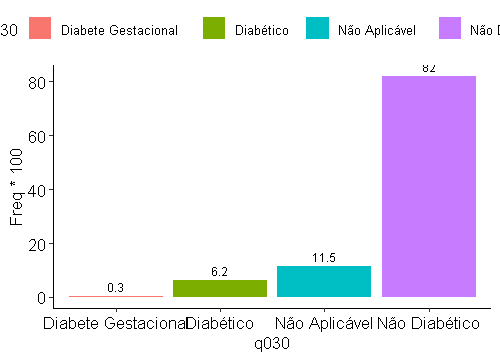

In [14]:
# q030 variável de diagnostico de diabetes
tir <- survey::svytable(~ q030, pns_design_srvyr)
tir.df <- as.data.frame(tir)
tir.df$q030 <- c("Não Aplicável", "Diabético", "Diabete Gestacional", "Não Diabético")
tir.df$Freq <- tir.df$Freq / sum(tir.df$Freq) 

options(repr.plot.width = 5, repr.plot.height = 3.6, repr.plot.res = 100)    
p <-ggplot(data=tir.df, aes(x=q030, y=Freq*100, fill = q030)) +
  geom_bar(stat="identity") +
  geom_text(aes(label=round(Freq*100, digits = 1)), vjust=-0.5, color="black", size=3)+ 
  labs_pubr() + theme_pubr()
p


### Porcentagem de Diagnóstico de Diabetes por sexo

Realizando uma análise mais específica, obtivemos também consistência nos dados que dizem a respeita da taxa de diabéticos em relação ao sexo, como resultado obtivemos uma taxa de 5,4% para os homens e 7% para as mulheres. Para verificar a consistência dos dados utilizamos um artigo científico publicado na biblioteca virtual de saúde (SciELO).  
   
Para o cálculo utilizamos a variável `c006` que representa o sexo do entrevistado e a variável `q030` utilizada na análise anterior.
   
Artigo:
   http://www.scielo.br/scielo.php?pid=s2237-96222015000200305&script=sci_abstract&tlng=pt
   

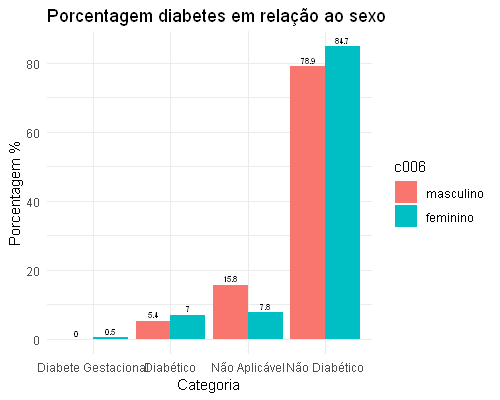

In [15]:

# c006 variavel do sexo do individuo

diab_sexo <- survey::svytable(~ q030 + c006, pns_design_srvyr)
diab_sexo.df <- as.data.frame(diab_sexo)


diab_sexo.df[diab_sexo.df$c006 == "masculino",c("Freq")] <- diab_sexo.df[diab_sexo.df$c006 == "masculino",c("Freq")]/sum(diab_sexo.df[diab_sexo.df$c006 == "masculino",c("Freq")] )
                                                                                                         diab_sexo.df[diab_sexo.df$c006 == "feminino",c("Freq")] <- diab_sexo.df[diab_sexo.df$c006 == "feminino",c("Freq")]/sum(diab_sexo.df[diab_sexo.df$c006 == "feminino",c("Freq")] )                                 
                                                                                       
diab_sexo.df$q030 <-  c("Não Aplicável", "Diabético", "Diabete Gestacional", "Não Diabético", "Não Aplicável", "Diabético", "Diabete Gestacional", "Não Diabético")

options(repr.plot.width = 5, repr.plot.height = 4)                                                                                              
p1 <-ggplot(data=diab_sexo.df, aes(x=q030, y=Freq*100 ,fill=c006)) +
  geom_bar(position="dodge", stat="identity") +
  geom_text(aes(label=round(Freq*100, digits = 1)), position=position_dodge(width=0.9), vjust=-0.5, color="black", size=2)+
  theme_minimal()+
  ggtitle("Porcentagem diabetes em relação ao sexo") +
  xlab("Categoria") + ylab("Porcentagem %") 


p1


### Procentagem de diabéticos por Faixa Etária

Analisando a população brasileira por faixa etária e considerando apenas pessoas com 60 anos ou mais, obtivemos uma taxa de 18,1% do total dessa população-alvo com o diagnóstico de diabetes. Utilizando como referência o atlas do IDF de 2017 que utiliza a população acima dos 65 anos de idade que contabiliza um total de 19% de diabéticos, chegamos a valores muito próximos.

fonte:
   https://www.diabetes.org.br/profissionais/images/2018/poster-atlas-idf-2017.pdf

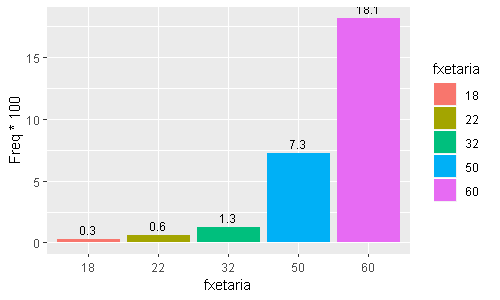

In [16]:

fxetaria_diab.df = as.data.frame(survey::svytable(~fxetaria + q030, pns_design_srvyr))

grp <- group_by(fxetaria_diab.df, fxetaria) %>% summarise(freq = sum(Freq))

fxetaria_diab.df <- fxetaria_diab.df[fxetaria_diab.df$q030 == "1",]

fxetaria_diab.df$Freq <- fxetaria_diab.df$Freq/grp$freq

fxetaria_diab.df <- fxetaria_diab.df[-2]

options(repr.plot.width = 5, repr.plot.height = 3)
p <- ggplot(data=fxetaria_diab.df, aes(x=fxetaria, y=Freq * 100, fill = fxetaria)) +     
   geom_bar( stat = "identity",  position = "dodge")+  geom_text(aes(label=round(Freq*100, digits = 1)), 
   position=position_dodge(width=0.9), vjust=-0.5, color="black", size=3)

p


### Taxa de diabéticos por frequencia de atividade física

   Um dos fatores preditores que podem indicar se uma pessoa é propensa ou não a desenvolver a diabetes é se ela pratica ou não atividade física. Mais de 80% dos diabéticos não praticam atividades físicas, mas vemos que há um aumento dos diabéticos que mantém uma frequencia de 1 vez por semana ou mais. 
   Como demonstrado no artigo abaixo, realizar atividades físicas é essencial para ajudar no bom controle da doença e garantir uma boa qualidade de vida. 
   
Artigo:
   https://www.diabetes.org.br/publico/meu-esporte-minha-vida/965-atividade-fisica-e-diabetes

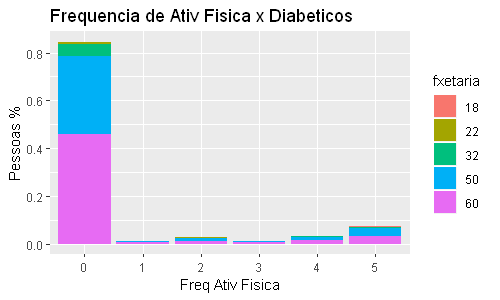

In [17]:
freq_diab <- survey::svytable(~ q030 + freqativ + fxetaria , pns_design_srvyr)
freq_diab.df <- as.data.frame(freq_diab)

freq_diab.df <- freq_diab.df[freq_diab.df$q030 == '1',]

freq_diab.df$Freq <- freq_diab.df$Freq/sum(freq_diab.df$Freq)    

options(repr.plot.width = 5, repr.plot.height = 3)
g <- ggplot(data = freq_diab.df) + 
   geom_bar(aes(x = freqativ, y = Freq, fill=fxetaria ), stat = "identity") +
   labs(x = "Freq Ativ Fisica",y = "Pessoas %", title = "Frequencia de Ativ Fisica x Diabeticos") 
g


## Taxa de diabéticos por região e por situação censitária


In [18]:

dist_populacao <- as.data.frame(survey::svytable(~region + v0026, pns_design_srvyr ))

pop_aux1 <- dist_populacao[dist_populacao$v0026 == 1,]
colnames(pop_aux1) <- c("Regiao", "Urbano", "Freq_Urbano")

pop_aux2 <- dist_populacao[dist_populacao$v0026 == 2,]
colnames(pop_aux2) <- c("Regiao", "Rural", "Freq_Rural")

dist_populacao <- cbind(pop_aux1,pop_aux2[, c("Rural", "Freq_Rural")])

dist_populacao$total <- dist_populacao$Freq_Urbano + dist_populacao$Freq_Rural

dist_populacao[,c("Regiao", "Freq_Urbano", "Freq_Rural")]


Regiao,Freq_Urbano,Freq_Rural
Norte,8519136,2366831.9
Nordeste,29696279,9251295.4
Sudeste,59677481,4397201.2
Sul,18410830,3213833.5
Centro-Oeste,9828695,946873.7


   Dos aproximadamente 146 milhões de brasileiros acima de 18 anos, cerca de 64 milhões(44%) estão no sudeste, isso implica que a quantidade de diabéticos nessa região vai muito maior do que as outras regiões como vemos no gráfico abaixo. Cerca de 49,7% dos diabéticos residem no sudeste brasileiro.


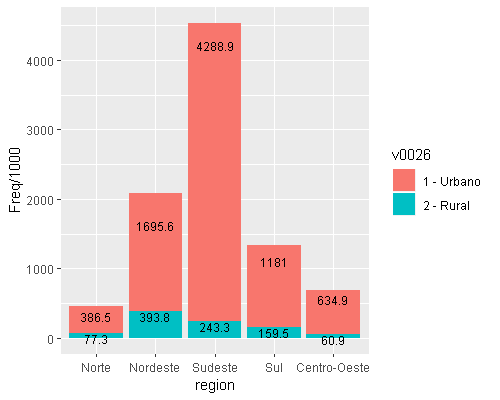

In [19]:
#* `Q030`	- Algum médico já lhe deu o diagnóstico de diabetes?
#   + `1` - Sim
#region
diab_estados <- survey::svytable(~ q030 + region + v0026, pns_design_srvyr )
diab_estados.df <- as.data.frame(diab_estados)

diab_estados.df <- diab_estados.df[diab_estados.df$q030 == '1',]
#diab_estados.df$Freq <- diab_estados.df$Freq / sum(diab_estados.df$Freq)

diab_estados.df$v0026 = as.character(diab_estados.df$v0026)
diab_estados.df$v0026[diab_estados.df$v0026 == 1]  = "1 - Urbano"
diab_estados.df$v0026[diab_estados.df$v0026 == 2]  = "2 - Rural"

options(repr.plot.width = 5, repr.plot.height = 4)
p <-ggplot(data=diab_estados.df, aes(x=region, y=Freq/1000, fill=v0026)) +
  geom_bar(stat="identity") +
  geom_text(aes(label=round(Freq/1000, digits = 1)), vjust=1, color="black", size=3)
p


## Distribuição das taxas de diabéticos por estado

ARTIGO

   Como demonstrado no artigo acima as maiores taxas de diabéticos do Brasil estão em Mato Grosso do Sul, São Paulo e Rio Grande do Sul respectivamente. Esses dados correspondem com as taxas demonstrados no gráfico abaixo.

Warning message:
"package 'brazilmaps' was built under R version 3.6.3"

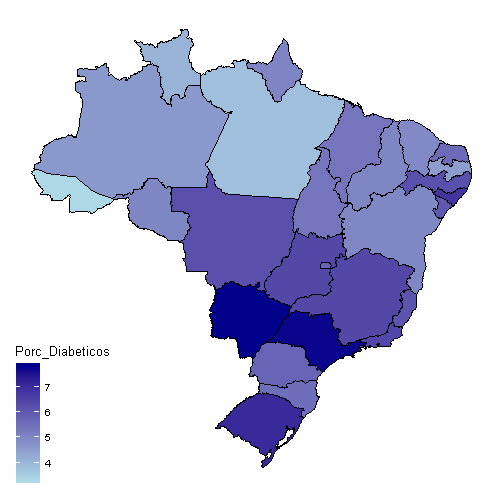

In [23]:
#* `Q030`	- Algum médico já lhe deu o diagnóstico de diabetes?
#   + `1` - Sim
#   + V0001 - Unidade da Federação
# install.packages("brazilmaps")
library(brazilmaps)
mapa <- get_brmap("State")

diab_estados <- as.data.frame(survey::svytable(~ v0001 + q030 , pns_design_srvyr))
qtd_estados = aggregate(diab_estados$Freq, by=list(Category=diab_estados$v0001), FUN=sum)

diab_estados <- diab_estados[diab_estados$q030 == 1,]

diab_estados$Porcent <- diab_estados$Freq / qtd_estados$x


teste <- toupper(c("Rondônia","Acre","Amazonas","Roraima","Pará","Amapá","Tocantins","Maranhão","Piauí","Ceará",
          "Rio Grande do Norte","Paraíba","Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro","São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul",
          "Mato Grosso","Goiás","Distrito Federal"))

porc_est <- as.data.frame(teste)
porc_est$Porc_Diabeticos <- diab_estados$Porcent * 100
##
##uf_map <- get_brmap("State") %>% 
#  inner_join(porc_est, c("nome" = "teste"))

#uf_map %>% 
#  ggplot(aes(fill = Porcent)) +
#  geom_sf() +
#  scale_fill_continuous(low = "lightblue", high = "darkblue") 

options(repr.plot.width = 5, repr.plot.height = 5)
plot_brmap(get_brmap("State"), data_to_join = porc_est, join_by = c("nome" = "teste"),
var = "Porc_Diabeticos") + scale_fill_continuous(low = "lightblue", high = "darkblue") 




## Distribuição da idade de diagnóstico de Diabéticos

Temos o gráfico que demonstra a idade que as pessoas foram diagnosticadas com a doença. Acima dos 30 anos é que os diagnósticos são mais realizados e tendo seu pico próximo aos 50 anos. Como idade é um dos fatores preditivos, faz sentido que com o passar dos anos a quantidade de diagnósticos aumente.

In [24]:
pns_design_srvyr$variables$q031 <- ifelse(pns_design_srvyr$variables$q031 == '00', pns_design_srvyr$variables$c008, pns_design_srvyr$variables$q031)

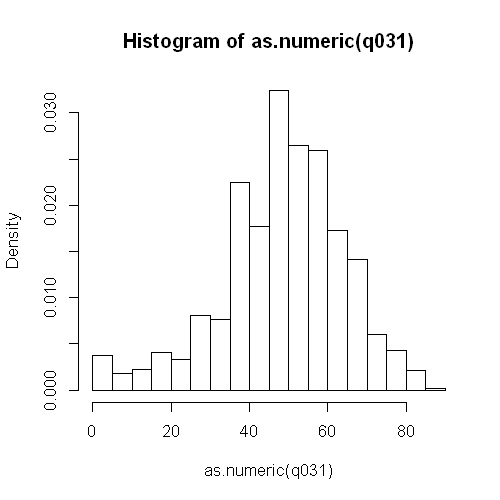

In [25]:
survey::svyhist(~as.numeric(q031), subset(pns_design_srvyr, q030==1))
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 100)
dens <- survey::svysmooth(~as.numeric(q031), subset(pns_design_srvyr, (q030==1) & (q030!=" ")))

## Distribuição da escolaridade no diagnóstico de Diabetes

Após realizadas as análises os maiores indices de diabéticos encontram-se em pessoas que não possuem escolaridade(Classe 0 - 6.6%) e nos que fizeram somente até o ensino fundamental(Classe 1 - 8.3%). As menores prevalências se encotram nas pessoas que possuem ensino superior(Classe 3 - 4%) e doutorado(Classe 5 - 4.2%).




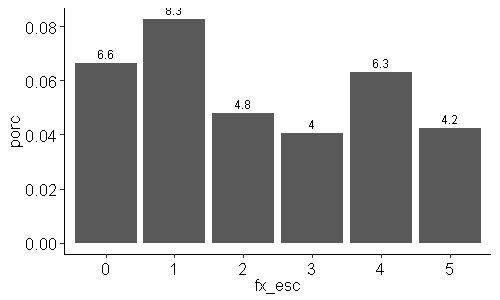

In [26]:

diab_esc <- survey::svytable(~ q030 + fx_esc, pns_design_srvyr)
diab_esc <- as.data.frame(diab_esc)
diab_esc$porc = 0

pop_esc = group_by(diab_esc, fx_esc) %>% summarise(freq = sum(Freq))

diab_esc = diab_esc[diab_esc$q030 == "1", ]

for (i in pop_esc$fx_esc){
   diab_esc[diab_esc$q030 == "1" & diab_esc$fx_esc == i, c("porc")] = diab_esc[diab_esc$q030 == "1" & diab_esc$fx_esc == i, ]$Freq / pop_esc[pop_esc$fx_esc == i,]$freq 
}

options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 100)
p <-ggplot(data=diab_esc, aes(x=fx_esc, y=porc )) +
  geom_bar(stat="identity") +
  geom_text(aes(label=round(porc*100, digits = 1)), vjust=-0.5, color="black", size=3)+ 
  labs_pubr() + theme_pubr()
p


## Data Prep

Limpando pessoas que nunca fizeram exame de pressão alta, colesterol alto e diabetes:

In [27]:
#Separando a base de dados

df = pns_design_srvyr[ ,c("c006", "c009", "fx_esc", "w00103", "w00203", "p009", "p018", "p020", "p025", "p026", "p028", "p035", "p050", "q002", "q029", "q060", "q068", "q124","r039", "freqativ", "fxetaria", "idade", "imc", "q030")]



names(df$variables) = c("sexo_c006","cor_raca_c009", "faixa_escolaridade", "peso_w00103", "altura_w00203", "come_verduras_p009", "come_frutas_p018", "refrigerante_suco_p020", "alimentos_doces_p025", "substitui_refeicoes_p026", "bebida_alcoolica_p028", "dias_semana_ativ_fisica_p035", "fumante_p050", "pressao_alta_q002", "exames_glicemia_q029", "colesterol_alto_q060", "avc_q068", "insuficiencia_renal_q124", "ja_ficou_gravida_r039", "freqativ", "fxetaria", "idade", "imc", "diagnostico_diabetes_q030")

#sexo_c006
#fumante_p050
#pressao_alta_q002
#colesterol_alto_q060
#avc_q068
#insuficiencia_renal_q124

In [28]:

df <- subset(df, diagnostico_diabetes_q030 != " " & diagnostico_diabetes_q030 != 2 & pressao_alta_q002 != " " & colesterol_alto_q060 != " ")


### Preenchendo NAs

* Variáveis d009, p028, p035 e r039 que eram NAs serão preenchidas com 0, já que demonstram uma ausência de seus valores.

In [29]:

# pressao alta = q002

df$variables$faixa_escolaridade = as.numeric(df$variables$faixa_escolaridade)
df$variables[is.na(df$variables$faixa_escolaridade), c("faixa_escolaridade")] = 0
df$variables[is.na(df$variables$bebida_alcoolica_p028), c("bebida_alcoolica_p028")] = 0
df$variables[is.na(df$variables$dias_semana_ativ_fisica_p035), c("dias_semana_ativ_fisica_p035")] = 0
df$variables[df$variables$ja_ficou_gravida_r039 == " ", c("ja_ficou_gravida_r039")] = 0
df$variables[df$variables$pressao_alta_q002 == " ", c("pressao_alta_q002")] = 0
df$variables[df$variables$colesterol_alto_q060 == " ", c("colesterol_alto_q060")] = 0
df$variables[df$variables$diagnostico_diabetes_q030 == " ", c("diagnostico_diabetes_q030")] = 0
df$variables[df$variables$diagnostico_diabetes_q030 == "2", c("diagnostico_diabetes_q030")] = 0
df$variables[df$variables$diagnostico_diabetes_q030 == "3", c("diagnostico_diabetes_q030")] = 0



* Variável c006(peso), será preenchida com a média das pessoas separadas pelo sexo(c006) e pela faixa etária(fxetaria).

In [30]:

df$variables$sexo_c006 <- as.character(df$variables$sexo_c006) 

masc_18 = as.numeric(survey::svymean(~peso_w00103 ,subset(x = df, subset = fxetaria == 18 & sexo_c006 == "masculino"), na.rm=TRUE))
masc_22 = as.numeric(survey::svymean(~peso_w00103 ,subset(x = df, subset = fxetaria == 22 & sexo_c006 == "masculino"), na.rm=TRUE))
masc_32 = as.numeric(survey::svymean(~peso_w00103 ,subset(x = df, subset = fxetaria == 32 & sexo_c006 == "masculino"), na.rm=TRUE))
masc_50 = as.numeric(survey::svymean(~peso_w00103 ,subset(x = df, subset = fxetaria == 50 & sexo_c006 == "masculino"), na.rm=TRUE))
masc_60 = as.numeric(survey::svymean(~peso_w00103 ,subset(x = df, subset = fxetaria == 60 & sexo_c006 == "masculino"), na.rm=TRUE))


femi_18 = as.numeric(survey::svymean(~peso_w00103 ,subset(x = df, subset = fxetaria == 18 & sexo_c006 == "feminino"), na.rm=TRUE))
femi_22 = as.numeric(survey::svymean(~peso_w00103 ,subset(x = df, subset = fxetaria == 22 & sexo_c006 == "feminino"), na.rm=TRUE))
femi_32 = as.numeric(survey::svymean(~peso_w00103 ,subset(x = df, subset = fxetaria == 32 & sexo_c006 == "feminino"), na.rm=TRUE))
femi_50 = as.numeric(survey::svymean(~peso_w00103 ,subset(x = df, subset = fxetaria == 50 & sexo_c006 == "feminino"), na.rm=TRUE))
femi_60 = as.numeric(survey::svymean(~peso_w00103 ,subset(x = df, subset = fxetaria == 60 & sexo_c006 == "feminino"), na.rm=TRUE))


df$variables[df$variables$fxetaria == 18 & df$variables$sexo_c006 == "masculino" & is.na(df$variables$peso_w00103), c("peso_w00103")] = round(masc_18, digits = 1)
df$variables[df$variables$fxetaria == 22 & df$variables$sexo_c006 == "masculino" & is.na(df$variables$peso_w00103), c("peso_w00103")] = round(masc_22, digits = 1)
df$variables[df$variables$fxetaria == 32 & df$variables$sexo_c006 == "masculino" & is.na(df$variables$peso_w00103), c("peso_w00103")] = round(masc_32, digits = 1)
df$variables[df$variables$fxetaria == 50 & df$variables$sexo_c006 == "masculino" & is.na(df$variables$peso_w00103), c("peso_w00103")] = round(masc_50, digits = 1)
df$variables[df$variables$fxetaria == 60 & df$variables$sexo_c006 == "masculino" & is.na(df$variables$peso_w00103), c("peso_w00103")] = round(masc_60, digits = 1)


df$variables[df$variables$fxetaria == 18 & df$variables$sexo_c006 == "feminino" & is.na(df$variables$peso_w00103), c("peso_w00103")] = round(femi_18, digits = 1)
df$variables[df$variables$fxetaria == 22 & df$variables$sexo_c006 == "feminino" & is.na(df$variables$peso_w00103), c("peso_w00103")] = round(femi_22, digits = 1)
df$variables[df$variables$fxetaria == 32 & df$variables$sexo_c006 == "feminino" & is.na(df$variables$peso_w00103), c("peso_w00103")] = round(femi_32, digits = 1)
df$variables[df$variables$fxetaria == 50 & df$variables$sexo_c006 == "feminino" & is.na(df$variables$peso_w00103), c("peso_w00103")] = round(femi_50, digits = 1)
df$variables[df$variables$fxetaria == 60 & df$variables$sexo_c006 == "feminino" & is.na(df$variables$peso_w00103), c("peso_w00103")] = round(femi_60, digits = 1)


* Variável w00203(altura), será preenchida com a média das pessoas separadas pelo sexo(c006) e pela faixa etária(fxetaria).

In [31]:


masc_18 = as.numeric(survey::svymean(~altura_w00203 ,subset(x = df, subset = fxetaria == 18 & sexo_c006 == "masculino"), na.rm=TRUE))
masc_22 = as.numeric(survey::svymean(~altura_w00203 ,subset(x = df, subset = fxetaria == 22 & sexo_c006 == "masculino"), na.rm=TRUE))
masc_32 = as.numeric(survey::svymean(~altura_w00203 ,subset(x = df, subset = fxetaria == 32 & sexo_c006 == "masculino"), na.rm=TRUE))
masc_50 = as.numeric(survey::svymean(~altura_w00203 ,subset(x = df, subset = fxetaria == 50 & sexo_c006 == "masculino"), na.rm=TRUE))
masc_60 = as.numeric(survey::svymean(~altura_w00203 ,subset(x = df, subset = fxetaria == 60 & sexo_c006 == "masculino"), na.rm=TRUE))


femi_18 = as.numeric(survey::svymean(~altura_w00203 ,subset(x = df, subset = fxetaria == 18 & sexo_c006 == "feminino"), na.rm=TRUE))
femi_22 = as.numeric(survey::svymean(~altura_w00203 ,subset(x = df, subset = fxetaria == 22 & sexo_c006 == "feminino"), na.rm=TRUE))
femi_32 = as.numeric(survey::svymean(~altura_w00203 ,subset(x = df, subset = fxetaria == 32 & sexo_c006 == "feminino"), na.rm=TRUE))
femi_50 = as.numeric(survey::svymean(~altura_w00203 ,subset(x = df, subset = fxetaria == 50 & sexo_c006 == "feminino"), na.rm=TRUE))
femi_60 = as.numeric(survey::svymean(~altura_w00203 ,subset(x = df, subset = fxetaria == 60 & sexo_c006 == "feminino"), na.rm=TRUE))


df$variables[df$variables$fxetaria == 18 & df$variables$sexo_c006 == "masculino" & is.na(df$variables$altura_w00203), c("peso_w00103")] = round(masc_18, digits = 1)
df$variables[df$variables$fxetaria == 22 & df$variables$sexo_c006 == "masculino" & is.na(df$variables$altura_w00203), c("peso_w00103")] = round(masc_22, digits = 1)
df$variables[df$variables$fxetaria == 32 & df$variables$sexo_c006 == "masculino" & is.na(df$variables$altura_w00203), c("peso_w00103")] = round(masc_32, digits = 1)
df$variables[df$variables$fxetaria == 50 & df$variables$sexo_c006 == "masculino" & is.na(df$variables$altura_w00203), c("peso_w00103")] = round(masc_50, digits = 1)
df$variables[df$variables$fxetaria == 60 & df$variables$sexo_c006 == "masculino" & is.na(df$variables$altura_w00203), c("peso_w00103")] = round(masc_60, digits = 1)


df$variables[df$variables$fxetaria == 18 & df$variables$sexo_c006 == "feminino" & is.na(df$variables$altura_w00203), c("altura_w00203")] = round(femi_18, digits = 1)
df$variables[df$variables$fxetaria == 22 & df$variables$sexo_c006 == "feminino" & is.na(df$variables$altura_w00203), c("altura_w00203")] = round(femi_22, digits = 1)
df$variables[df$variables$fxetaria == 32 & df$variables$sexo_c006 == "feminino" & is.na(df$variables$altura_w00203), c("altura_w00203")] = round(femi_32, digits = 1)
df$variables[df$variables$fxetaria == 50 & df$variables$sexo_c006 == "feminino" & is.na(df$variables$altura_w00203), c("altura_w00203")] = round(femi_50, digits = 1)
df$variables[df$variables$fxetaria == 60 & df$variables$sexo_c006 == "feminino" & is.na(df$variables$altura_w00203), c("altura_w00203")] = round(femi_60, digits = 1)

df <- df %>% mutate(imc = peso_w00103/(altura_w00203/100* altura_w00203/100)) 
df$variables <- df$variables %>% mutate(imcclass = case_when(imc < 17.0 ~ "1",
                                 imc >= 17.0 & imc < 18.5 ~ "2",
                                 imc >= 18.5 & imc < 25.0 ~ "3",
                                 imc >= 25.0 & imc < 30.0 ~ "4",
                                 imc >= 30.0 & imc < 35.0 ~ "5",
                                 imc >= 35.0 & imc < 40.0 ~ "6",
                                 imc >= 40.0 ~ "7"
                                 ))

df$variables <- df$variables[,c(1:23, 25, 24)]

### Inversão de valores de variáveis

Para permitir e simplificar a análise a partir de um modelo alteraremos os valor de variáveis.

`c006`, sexo:

Valor Original    |      Codificação Original         | Novo Valor    | Codificação Variável `pressao_alta_q002`
------------------|-----------------------------------|---------------|----------------------------------------
 masculino        |  1                                |     0         |  masculino
 femnino          |  2                                |     1         |  feminino
 

In [32]:

df$variables[df$variables$sexo_c006 == "masculino", c("sexo_c006")] = 0
df$variables[df$variables$sexo_c006 == "feminino", c("sexo_c006")] = 1


`q002`, pressão alta:

Valor Original    |      Codificação Original         | Novo Valor    | Codificação Variável `pressao_alta_q002`
------------------|-----------------------------------|---------------|----------------------------------------
 1                |  sim                              |     1         |  sim
 2                |  apenas na gravidez               |     1         |  sim
 3                |  não                              |     0         |  não
 

In [33]:

df$variables[df$variables$pressao_alta_q002 == 2, c("pressao_alta_q002")] = 1
df$variables[df$variables$pressao_alta_q002 == 3, c("pressao_alta_q002")] = 0


`q060`, colesterol alto:

Valor Original    |      Codificação Original         | Novo Valor    | Codificação Variável `colesterol_alto_q060`
------------------|-----------------------------------|---------------|----------------------------------------
 1                |  sim                              |     1         |  sim
 2                |  não                              |     0         |  não
 

In [34]:

df$variables[df$variables$colesterol_alto_q060 == 2, c("colesterol_alto_q060")] = 0


`q124`, insuficiencia renal:

Valor Original    |      Codificação Original    | Novo Valor    | Codificação Variável `insuficiencia_renal_q124`
------------------|-----------------------------------|---------------|----------------------------------------
 1                |  sim                              |     1         |  sim
 2                |  não                              |     0         |  não
 

In [35]:

df$variables[df$variables$insuficiencia_renal_q124 == 2, c("insuficiencia_renal_q124")] = 0


`p050`, fumante:
definição de fumante: http://pepsic.bvsalud.org/scielo.php?script=sci_arttext&pid=S1413-03942014000200015

Valor Original    |      Codificação Original    | Novo Valor    | Codificação Variável `fumante_p050`
------------------|-----------------------------------|---------------|----------------------------------------
 1                |  sim, diariamente                  |     1         |  sim
 2                |  sim, menos que diariamente        |     0         |  não
 3                |  não fumo atualmente               |     0         |  não

In [36]:

df$variables[df$variables$fumante_p050 == 2 | df$variables$fumante_p050 == 3, c("fumante_p050")] = 0


`q068`, avc:

Valor Original    |      Codificação Original    | Novo Valor    | Codificação Variável `ja_ficou_gravida_r039`
------------------|------------------------------|---------------|----------------------------------------
 1                |  sim                         |     1         |  sim
 2                |  não                         |     0         |  não

In [37]:

df$variables[df$variables$avc_q068 == 2, c("avc_q068")] = 0


`q068`, gravidez:

Valor Original    |      Codificação Original    | Novo Valor    | Codificação Variável `ja_ficou_gravida_r039`
------------------|------------------------------|---------------|----------------------------------------
 1                |  sim                         |     1         |  sim
 2                |  não                         |     0         |  não

In [38]:
df$variables[df$variables$ja_ficou_gravida_r039 == 2, c("ja_ficou_gravida_r039")] = 0

# Decisão

Definir remover os registros que tem como NA diagnóstico de colesterol alto q060, pressão alta q002 e diabetes q030.

In [34]:

perda_t <- as.data.frame(survey::svytable(~pressao_alta_q002 + colesterol_alto_q060 + diagnostico_diabetes_q030 , df))

print(paste0("quantidade total de diabéticos: ", sum(perda_t[perda_t$diagnostico_diabetes_q030 == 1, c("Freq")])) )
print(paste0("perda de diabéticos: ", sum(perda_t[perda_t$diagnostico_diabetes_q030 == 1 & (perda_t$pressao_alta_q002 == " " | perda_t$colesterol_alto_q060 == " "), c("Freq")])) )
print(paste0("porcentagem de perda de diabeticos: ", sum(perda_t[perda_t$diagnostico_diabetes_q030 == 1 & (perda_t$pressao_alta_q002 == " " | perda_t$colesterol_alto_q060 == " "), c("Freq")]) / sum(perda_t[perda_t$diagnostico_diabetes_q030 == 1, c("Freq")])  ))

print("")

print(paste0("quantidade total : ", sum(perda_t$Freq)))
print(paste0("perda total: ", sum(perda_t[ (perda_t$pressao_alta_q002 == " " | perda_t$colesterol_alto_q060 == " " | perda_t$diagnostico_diabetes_q030 == " "), c("Freq")])) )
print(paste0("porcentagem de perda total: ", sum(perda_t[(perda_t$pressao_alta_q002 == " " | perda_t$colesterol_alto_q060 == " " | perda_t$diagnostico_diabetes_q030 == " "), c("Freq")]) / sum(perda_t$Freq)))


[1] "quantidade total de diabéticos: 8944235.6255329"
[1] "perda de diabéticos: 0"
[1] "porcentagem de perda de diabeticos: 0"
[1] ""
[1] "quantidade total : 121609040.326191"
[1] "perda total: 0"
[1] "porcentagem de perda total: 0"


# Criando as variáveis dummies

Como todos as features utilizadas são categóricas precisamos transformá-las em dummies para utilização de um modelo de Regressão Logística. utilizaremos a biblioteca `dummies` para essa transormação.

In [39]:
df$variables$exames_glicemia_q029 = NULL

df_dummies = df[ ,c("faixa_escolaridade")]

# esc_dummies <- dummies::dummy(df$variables$escolaridade_d009, sep = "_",)
# df_dummies$variables <- cbind(df_dummies$variables, esc_dummies)
# df_dummies$variables <- df_dummies$variables[, -1]

df_factor = df$variables %>% mutate_if(is.numeric, as.character)

df_factor$sexo_c006 = as.numeric(df_factor$sexo_c006)
df_factor$fumante_p050 = as.numeric(df_factor$fumante_p050)
df_factor$pressao_alta_q002 = as.numeric(df_factor$pressao_alta_q002)
df_factor$colesterol_alto_q060 = as.numeric(df_factor$colesterol_alto_q060)
df_factor$avc_q068 = as.numeric(df_factor$avc_q068)
df_factor$insuficiencia_renal_q124 = as.numeric(df_factor$insuficiencia_renal_q124)
df_factor$ja_ficou_gravida_r039 = as.numeric(df_factor$ja_ficou_gravida_r039)



df_factor$peso_w00103 <- as.numeric(df_factor$peso_w00103)
df_factor$altura_w00203 <- NULL
df_factor$idade <- NULL
df_factor$imc <- NULL
df_factor$peso_w00103 <- NULL

df_factor = df_factor %>% mutate_if(is.character, as.factor)

dummies_df <- mlr::createDummyFeatures(df_factor)

df$variables = dummies_df

# Removendo dummies desnecessários

Para a criação de variáveis dummy, todos os fatores de cada variável foi tranformado em uma variável, assim o último fator criado de cada variável terá uma correlação perfeita com as demais variáveis, tendo um coeficiente indefinido.

In [40]:
df$variables$diagnostico_diabetes_q030.0 = NULL
df$variables$cor_raca_c009.9 = NULL
df$variables$faixa_escolaridade.5 = NULL
df$variables$come_verduras_p009.7 = NULL
df$variables$come_frutas_p018.7 = NULL
df$variables$refrigerante_suco_p020.7 = NULL
df$variables$alimentos_doces_p025.7 = NULL
df$variables$substitui_refeicoes_p026.7 = NULL
df$variables$bebida_alcoolica_p028.7 = NULL
df$variables$dias_semana_ativ_fisica_p035.7 = NULL
df$variables$freqativ.5 = NULL
df$variables$fxetaria.60 = NULL
df$variables$imcclass.7 = NULL

# Modelagem

Como modelo utilizaremos a Regressão Logística para fazer uma análise descritiva do comportamento das variáveis em relação aos diabéticos. O modelo utilizado encontra-se no pacote `survey` com a função `svyglm`, usado para a criação de modelos lineares para dados estratificados.

A família do modelo é a binomial(logit) onde teremos uma saída como uma porcentagem da pessoa pertencerem a classe de Diabéticos. 

In [66]:
construir_modelo <- function(df){

   nomes = names(df$variables[1:(length(df$variables) - 1)])
   #fla <- paste("diagnostico_diabetes_q030.1 ~", paste(nomes, collapse="+"), " -1")
   fla <- paste("diagnostico_diabetes_q030.1 ~", paste(nomes, collapse="+"))
   
   #gl <- survey::svyglm(as.formula(fla) , family = "quasibinomial", design=df)
   gl <- survey::svyglm(as.formula(fla) , family = "binomial", design=df)
   
   return(gl)
}
   
ordenar_pvalue <- function(model){
   
   df_model = data.frame(keyName=names(model$coefficients), value=model$coefficients, row.names=NULL)
   df_model$COEFF_ABS = abs(df_model$value)
   df_model$COEFF_ABS = abs(df_model$value)
   
   p <- coef(summary(model))[,4]
   df_p = data.frame(keyName=names(p), value=p, row.names=NULL)
   
   df_model$p_value <- p
   
   df_model <- df_model[order(df_model$COEFF_ABS),]
   
   return(df_model)
   
}


### Primeiro modelo:

In [50]:
modelb <- construir_modelo(df)

print(summary(modelb))

df_modelb = ordenar_pvalue(modelb)

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


Call:
svyglm(formula = as.formula(fla), design = df, family = "binomial")

Survey design:
subset(df, diagnostico_diabetes_q030 != " " & diagnostico_diabetes_q030 != 
    2 & pressao_alta_q002 != " " & colesterol_alto_q060 != " ")

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -0.646408   1.159312  -0.558 0.577155    
sexo_c006                      -0.171293   0.082744  -2.070 0.038486 *  
fumante_p050                   -0.196768   0.117247  -1.678 0.093360 .  
pressao_alta_q002               0.924637   0.074288  12.447  < 2e-16 ***
colesterol_alto_q060            0.739389   0.074128   9.975  < 2e-16 ***
avc_q068                        0.370584   0.144264   2.569 0.010232 *  
insuficiencia_renal_q124        0.252671   0.177022   1.427 0.153538    
ja_ficou_gravida_r039          -0.231973   0.109705  -2.115 0.034517 *  
cor_raca_c009.1                -2.426599   1.002573  -2.420 0.015538 *  
cor_raca_c009.2         

In [52]:
modelqb <- construir_modelo(df)

print(summary(modelqb))

df_modelqb = ordenar_pvalue(modelqb)

Warning message in summary.glm(g):
"observations with zero weight not used for calculating dispersion"Warning message in summary.glm(glm.object):
"observations with zero weight not used for calculating dispersion"


Call:
svyglm(formula = as.formula(fla), design = df, family = "quasibinomial")

Survey design:
subset(df, diagnostico_diabetes_q030 != " " & diagnostico_diabetes_q030 != 
    2 & pressao_alta_q002 != " " & colesterol_alto_q060 != " ")

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -0.646408   1.159312  -0.558 0.577155    
sexo_c006                      -0.171293   0.082744  -2.070 0.038486 *  
fumante_p050                   -0.196768   0.117247  -1.678 0.093360 .  
pressao_alta_q002               0.924637   0.074288  12.447  < 2e-16 ***
colesterol_alto_q060            0.739389   0.074128   9.975  < 2e-16 ***
avc_q068                        0.370584   0.144264   2.569 0.010232 *  
insuficiencia_renal_q124        0.252671   0.177022   1.427 0.153538    
ja_ficou_gravida_r039          -0.231973   0.109705  -2.115 0.034517 *  
cor_raca_c009.1                -2.426599   1.002573  -2.420 0.015538 *  
cor_raca_c009.2    

Com esses dados criamos 2 modelos, um com a família binomial e outra com a família quasibinomial, e calculamos o teste do qui-quadrado para observar se nosso modelo está com superdispersão, indicando um viés sobre os dados.

hipotese nula $\phi=1$ 

hipotese alternativa $\phi \neq 1$

In [54]:
pchisq(summary(modelqb)$dispersion[1] * modelb$df.residual, modelb$df.residual, lower.tail = F)

[1] 0.8115516

#### Variáveis com p_value maior que 0.5

In [94]:
df_modelb_r = df_modelb[df_modelb$p_value > 0.06, ]
df_modelb_r[order(df_modelb_r$keyName),]

,keyName,value,COEFF_ABS,p_value
1,(Intercept),-0.646408421,0.646408421,0.57715474
43,alimentos_doces_p025.3,0.009676616,0.009676616,0.95983622
44,alimentos_doces_p025.4,0.313013307,0.313013307,0.16150626
45,alimentos_doces_p025.5,-0.124135047,0.124135047,0.58313819
46,alimentos_doces_p025.6,-0.027345357,0.027345357,0.92030946
54,bebida_alcoolica_p028.0,0.344175699,0.344175699,0.18926005
55,bebida_alcoolica_p028.1,0.038255459,0.038255459,0.89476968
56,bebida_alcoolica_p028.2,-0.169676906,0.169676906,0.56367787
58,bebida_alcoolica_p028.4,-0.391613460,0.391613460,0.44860059
59,bebida_alcoolica_p028.5,-0.033027753,0.033027753,0.94598335


* <b>Consumo de alimentos doces(p025):</b> dessa variável, apenas os consumos menores que 3 vezes por semanas estão contribuindo para o modelo, e quanto maior o consumo menor a probabilidade de ser diabético, iremos alterar para a seguinte classificação:

Variável    |      Classes anteriores    | Novas Classes    | 
------------------|-----------------------------------|---------------
Consumo de alimentos doces(p025)| 0, 1, 2, 3, 4, 5, 6 e 7 vezes por semana | 1: <= 2 vezes por semana <br> 0: > 1 vezes por semana   

* <b>Consumo de bebidas alcoolicas(p028):</b> dessa variável, apenas os consumos de 3 vezes por semanas está contribuindo para o modelo, e quanto maior o consumo menor a probabilidade de ser diabético. essa variável terá a seguinte classificação:

Variável    |      Classes anteriores    | Novas Classes    | 
------------------|-----------------------------------|---------------
Consumo de bebidas alcoolicas(p028)| 0, 1, 2, 3, 4, 5, 6 e 7 vezes por semana | 1: >= 3 vezes por semana <br> 0: < 3 vezes por semana 

* <b>Consumo de frutas(p009):</b> dessa variável, apenas o consumo menor que 4 vezes por semana contribui para o modelo, e quanto maior o consumo maior é a probabilidade de ser diabético

Variável    |      Classes anteriores    | Novas Classes    | 
------------------|-----------------------------------|---------------
Consumo de Frutas(p009)| 0, 1, 2, 3, 4, 5, 6 e 7 vezes por semana | 1: >= 4 vezes por semana <br> 0: < 4 vezes por semana 

* <b>Consumo de verduras(p009):</b> variável que será removida do modelo.

In [78]:
droplist1 <- df_modelb[df_modelb$p_value > 0.06, 1] 

df2 = df
df2$variables <- df2$variables[, !colnames(df2$variables) %in% droplist1]

### Segundo modelo:

Sem as variáveis com p_value maior que 0.5 criamos mais um modelo.

In [79]:
model2 <- construir_modelo(df2)

print(summary(model2))

df_model2 = ordenar_pvalue(model2)

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


Call:
svyglm(formula = as.formula(fla), design = df, family = "binomial")

Survey design:
subset(df, diagnostico_diabetes_q030 != " " & diagnostico_diabetes_q030 != 
    2 & pressao_alta_q002 != " " & colesterol_alto_q060 != " ")

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.06442    1.02986   0.063 0.950124    
sexo_c006                  -0.05875    0.08037  -0.731 0.464814    
pressao_alta_q002           0.95874    0.07317  13.104  < 2e-16 ***
colesterol_alto_q060        0.73513    0.07383   9.957  < 2e-16 ***
avc_q068                    0.40169    0.14529   2.765 0.005716 ** 
ja_ficou_gravida_r039      -0.20095    0.11019  -1.824 0.068261 .  
cor_raca_c009.1            -2.46786    1.01723  -2.426 0.015296 *  
cor_raca_c009.2            -2.34468    1.02454  -2.289 0.022146 *  
cor_raca_c009.3            -2.49521    1.06816  -2.336 0.019528 *  
cor_raca_c009.4            -2.53869    1.01800  -2.494 0.012668 *  
cor_ra

Variáveis que serão removidas por ter um p_value maior que 0.5:

In [80]:
df_model2[df_model2$p_value > 0.06, ]

,keyName,value,COEFF_ABS,p_value
2,sexo_c006,-0.05874923,0.05874923,0.4648143
1,(Intercept),0.06442173,0.06442173,0.9501241
20,substitui_refeicoes_p026.0,-0.09711578,0.09711578,0.1625839
15,come_frutas_p018.3,-0.17624053,0.17624053,0.1232175
30,imcclass.5,-0.18453090,0.18453090,0.1129171
6,ja_ficou_gravida_r039,-0.20094664,0.20094664,0.0682605
16,refrigerante_suco_p020.3,0.25215875,0.25215875,0.1171741


In [81]:
droplist2 <- df_model2[df_model2$p_value > 0.06, 1] 

df3 = df2
df3$variables <- df3$variables[, !colnames(df3$variables) %in% droplist2]

### Terceiro Modelo

Sem as variáveis com p_value maior que 0.5 do segundo modelo criamos mais um modelo.

In [82]:
model3 <- construir_modelo(df3)

print(summary(model3))

df_model3 = ordenar_pvalue(model3)

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


Call:
svyglm(formula = as.formula(fla), design = df, family = "binomial")

Survey design:
subset(df, diagnostico_diabetes_q030 != " " & diagnostico_diabetes_q030 != 
    2 & pressao_alta_q002 != " " & colesterol_alto_q060 != " ")

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -0.25066    1.00437  -0.250 0.802929    
pressao_alta_q002           0.96129    0.07293  13.180  < 2e-16 ***
colesterol_alto_q060        0.73397    0.07387   9.936  < 2e-16 ***
avc_q068                    0.40447    0.14434   2.802 0.005093 ** 
cor_raca_c009.1            -2.37365    1.00061  -2.372 0.017717 *  
cor_raca_c009.2            -2.26257    1.00723  -2.246 0.024723 *  
cor_raca_c009.3            -2.40148    1.05164  -2.284 0.022436 *  
cor_raca_c009.4            -2.46694    1.00156  -2.463 0.013804 *  
cor_raca_c009.5            -2.10444    1.06444  -1.977 0.048087 *  
come_frutas_p018.0         -0.36912    0.13315  -2.772 0.005585 ** 
come_f

In [83]:
df_model3[df_model3$p_value > 0.06, ]

,keyName,value,COEFF_ABS,p_value
1,(Intercept),-0.2506611,0.2506611,0.8029286
22,imcclass.1,-0.8200725,0.8200725,0.1009833


In [85]:
droplist3 <- df_model3[df_model3$p_value > 0.06, 1] 

df4 = df3
df4$variables <- df4$variables[, !colnames(df4$variables) %in% droplist3]

### Quarto Modelo

Ultimo modelo criado com todas as variáveis com um p_value menor que 0.5.

In [86]:
model4 <- construir_modelo(df4)

print(summary(model4))

df_model4 = ordenar_pvalue(model4)

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


Call:
svyglm(formula = as.formula(fla), design = df, family = "binomial")

Survey design:
subset(df, diagnostico_diabetes_q030 != " " & diagnostico_diabetes_q030 != 
    2 & pressao_alta_q002 != " " & colesterol_alto_q060 != " ")

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -0.25598    1.00278  -0.255 0.798527    
pressao_alta_q002           0.96660    0.07277  13.283  < 2e-16 ***
colesterol_alto_q060        0.73575    0.07392   9.954  < 2e-16 ***
avc_q068                    0.40657    0.14430   2.818 0.004856 ** 
cor_raca_c009.1            -2.38350    0.99888  -2.386 0.017059 *  
cor_raca_c009.2            -2.27476    1.00542  -2.263 0.023705 *  
cor_raca_c009.3            -2.41109    1.05010  -2.296 0.021710 *  
cor_raca_c009.4            -2.47889    0.99987  -2.479 0.013197 *  
cor_raca_c009.5            -2.12012    1.06303  -1.994 0.046157 *  
come_frutas_p018.0         -0.36941    0.13338  -2.770 0.005630 ** 
come_f

In [87]:
df_model4

,keyName,value,COEFF_ABS,p_value
12,come_frutas_p018.2,-0.2125640,0.2125640,5.645851e-02
11,come_frutas_p018.1,-0.2487759,0.2487759,5.618026e-02
1,(Intercept),-0.2559754,0.2559754,7.985268e-01
15,alimentos_doces_p025.2,0.3263080,0.3263080,1.303091e-02
23,imcclass.4,-0.3349978,0.3349978,1.923182e-05
10,come_frutas_p018.0,-0.3694117,0.3694117,5.629585e-03
4,avc_q068,0.4065665,0.4065665,4.856391e-03
14,alimentos_doces_p025.1,0.5340244,0.5340244,7.109083e-07
22,imcclass.3,-0.5766423,0.5766423,1.459552e-11
21,fxetaria.50,-0.7056817,0.7056817,4.555666e-20


In [89]:
df_model4[order(df_model4$keyName),]

,keyName,value,COEFF_ABS,p_value
1,(Intercept),-0.2559754,0.2559754,7.985268e-01
13,alimentos_doces_p025.0,1.3619471,1.3619471,2.812324e-47
14,alimentos_doces_p025.1,0.5340244,0.5340244,7.109083e-07
15,alimentos_doces_p025.2,0.3263080,0.3263080,1.303091e-02
4,avc_q068,0.4065665,0.4065665,4.856391e-03
17,bebida_alcoolica_p028.3,-0.9550342,0.9550342,4.132061e-04
3,colesterol_alto_q060,0.7357547,0.7357547,3.819991e-23
10,come_frutas_p018.0,-0.3694117,0.3694117,5.629585e-03
11,come_frutas_p018.1,-0.2487759,0.2487759,5.618026e-02
12,come_frutas_p018.2,-0.2125640,0.2125640,5.645851e-02


## Conclusão do modelo com as variáveis dummies:

Com os dados da PNS, feito em âmbito nacional, não é possível a criação de um modelo preditivo já que não temos os dados históricos das pessoas. 

Das variáveis utilizadas temos um modelo que demonstra o comportamento dos diabéticos no Brasil, observando como as pessoas estão se abstendo de hábitos considerados prejudiciais:

* <b>Consumo de alimentos doces(p025), 0, 1 e 2 vezes por semana:</b> variável de comportamento alimentar das pessoas com coeficientes positivos, por ser um fator de constante atenção de suas vidas, os diabéticos tendem a consumir menos alimentos doces após seu diagnóstico. Pelo comportento da variável, quanto maior seu consumo menos probabilidade da pessoa ser diabética.
* <b>Diagnóstico de AVC(q068):</b> variável que indica se uma pessoa já teve um AVC, tendo seu coeficiente positivo é um sinal de que os diabéticos também pode ter sofrido com esse problema.
* <b>Consumo de Bebidas Alcoolicas(p028), 3 vezes por semana:</b> como demonstrado no artigo(https://www.diabetes.org.br/publico/images/pdf/sbd_dm2_2019_2.pdf) CONDUTA TERAPÊUTICA NO DIABETES TIPO 2, o 
* <b>Colesterol Alto(q060):</b> variável que indica o diagnóstico de colesterol alto, sendo um problema decorrente da alimentação e o estilo de vida, e tendo um coeficiente positivo, é mais um ponto que pode ser indicador de diabéticos.
* <b>Consumo de Frutas(p018), 0, 1 e 2 vezes por semana:</b>  variável que indica o consumo de frutas por semana, com coeficiente negativo, indica que pessoas que comem frutas têm menos probabilidade de ter diabetes, porém há um aumento da probabilidade de ser diabéticos com o aumento do consumo.
* <b>Cor/Raça(c009):</b> variável indicando a cor das pessoas, com os coeficientes negativos elas não têm diferenças significantes entre elas. 
* <b>Faixa Etária:</b> variável que indica a divisão da população pela idade, essa variável está com os coeficientes negativos mas quanto maior a faixa etária mais a probabilidade da pessoa ser diabética. A maior diferença é entre a faixa etária 32 e 50.
* <b>IMC, 3 e 4:</b> variável que indica  índice de massa corporal para determinar se uma pessoa está com seu peso ideal. No modelo os valores 3(normal) e 4(sobrepeso) têm um coeficiente negativo, porém a influência negativa diminui com o aumento do IMC. 
* <b>Pressão Alta(q002):</b> diagnóstico de hipertensão, uma doença que pode ser adquirida a partir de hábitos de vida do indivíduo e contém um coeficiente positivo, indicando uma maior probabilidade da pessoa ser diabética.
* <b>Substitui Refeições(p026) 6 vezes por semana:</b> variável que indica quantas vezes por semana uma pessoa substitui refeições por lanches(pizza, sanduiches...) , tendo um valor negativo, indicando um estilo de vida mais desregrado.

Variáveis dummies como a de consumo de alimentos doces(p025), consumo de frutas(p018), consumo de bebidas alcoolicas(p028), substiitui refeições por lanches(p026), Faixa Etária e IMC onde possuiam vários valores e alguns deles foram significativos para o modelo, iremos reorganizá-las e tranformar em somente uma variável dividindo seus valores em 2 classes:

Variável    |      Classes anteriores    | Novas Classes    | 
------------------|-----------------------------------|---------------
Consumo de alimentos doces(p025)| 0, 1, 2, 3, 4, 5, 6 e 7 vezes por semana | 1: <= 2 vezes por semana <br> 0: > 2 vezes por semana         
Consumo de frutas(p018) | 0, 1, 2, 3, 4, 5, 6 e 7 vezes por semana |  1: <= 2 vezes por semana <br> 0: > 2 vezes por semana 
Consumo de bebidas alcoolicas(p018) | 0, 1, 2, 3, 4, 5, 6 e 7 vezes por semana |  1: >= 3 vezes por semana <br> 0: < 3 vezes por semana  
Substitui refeições por lanches(p026) | 0, 1, 2, 3, 4, 5, 6 e 7 vezes por semana | 1: >= 6 vezes por semana <br> 0: < 6 vezes por semana
Faixa Etária | 18, 22, 32, 50 e 60 | 1: <= faixa etária de 50 <br> 0: > faixa etária de 50 
IMC | 1, 2, 3, 4, 5, 6 e 7 | 1 >= 4 <br> 0 < 4